# Emotion Detection with CNN

##### model Description 

In this model, we'll impement CNN in [Emotions](https://www.kaggle.com/datasets/nelgiriyewithana/emotions) data from Kaggle and applying convolutional filters over word embeddings. 
Our model learns to extract meaningful features and patterns indicative of different emotions
 seeks to identify if a text expresses any type 6 labels of emotion sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).



### About Dataset

Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

### Import Libraries
ocessing.

In [37]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

import warnings
warnings.filterwarnings ('ignore')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Dataset


### Reading CSV file

In [38]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\archive (2)\text.csv")
print(len(df))
df.head()

416809


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


### Droping Unnecessary labels

In [39]:
df=df.drop(labels=['Unnamed: 0'],axis=1)
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


### Removing duplicated rows

In [41]:
df.duplicated().sum()
"""get the number of the duplicated rows"""
print(f"number of duplicated row are {df.duplicated().sum()}")


number of duplicated row are 686


In [42]:
data = df.drop_duplicates()
"""drop all the duplicated rows"""
len(data)

416123

In [43]:
df1=df.copy()

### Filtering
Stemmers: remove morphological affixes from words, leaving only the word stem [stemmer](https://www.nltk.org/howto/stem.html).
Stop word: a commonly used word (such as “the”, “a”, “an”, or “in”) [stopwords](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/).
Substitution

##### remove the extended words

In [44]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\.\S+', '', text)
    text = re.sub('\w*\d\w*', '', text)
    tokens = word_tokenize(text)
    # Remove stopwords and stem tokens
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    # Join the tokens back into a single string
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

# Clean the text data in the 'text' column of DataFrame df
df1['cleaned_text'] = df1['text'].apply(clean_text)

# Print the DataFrame with cleaned text data
df1


,text,label,cleaned_text
0,i just feel really helpless and heavy hearted,4,feel realli helpless heavi heart
1,ive enjoyed being able to slouch about relax a...,0,ive enjoy abl slouch relax unwind frankli need...
2,i gave up my internship with the dmrg and am f...,4,gave internship dmrg feel distraught
3,i dont know i feel so lost,0,dont know feel lost
4,i am a kindergarten teacher and i am thoroughl...,4,kindergarten teacher thoroughli weari job take...
...,...,...,...
416804,i feel like telling these horny devils to find...,2,feel like tell horni devil find site suit sort...
416805,i began to realize that when i was feeling agi...,3,began realiz feel agit restless would thought ...
416806,i feel very curious be why previous early dawn...,5,feel curiou previou earli dawn time seek troubl
416807,i feel that becuase of the tyranical nature of...,3,feel becuas tyran natur govern el salvador sav...


In [45]:
df1=df1.drop(labels="text" ,axis=1)

In [46]:
df1.label.value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [47]:
mapping = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

df1['Emotion'] = df1['label'].map(mapping)


In [48]:
df1

,label,cleaned_text,Emotion
0,4,feel realli helpless heavi heart,fear
1,0,ive enjoy abl slouch relax unwind frankli need...,sadness
2,4,gave internship dmrg feel distraught,fear
3,0,dont know feel lost,sadness
4,4,kindergarten teacher thoroughli weari job take...,fear
...,...,...,...
416804,2,feel like tell horni devil find site suit sort...,love
416805,3,began realiz feel agit restless would thought ...,anger
416806,5,feel curiou previou earli dawn time seek troubl,surprise
416807,3,feel becuas tyran natur govern el salvador sav...,anger


In [49]:
emotion_counts = df1.groupby("Emotion").size()
emotion_counts

Emotion
anger        57317
fear         47712
joy         141067
love         34554
sadness     121187
surprise     14972
dtype: int64

### plot the distribusion


#### pie chart

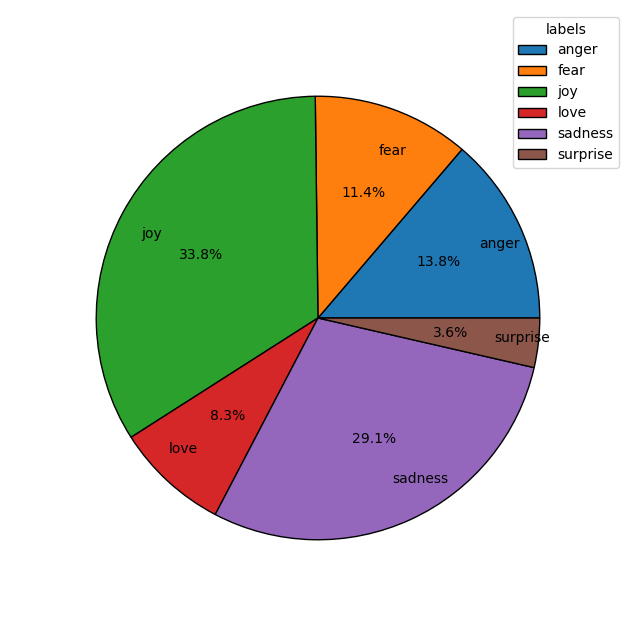

In [50]:
emotion_counts = df1.groupby("Emotion").size()
fig,ax=plt.subplots(1,figsize=(8,8))
ax.pie(x=emotion_counts, 
    labels=emotion_counts.index,
      autopct='%1.1f%%',wedgeprops={'edgecolor':'black'}
      ,labeldistance=.8,radius=.9)
ax.legend(loc=0,title="labels")
plt.show()

#### WordCloud

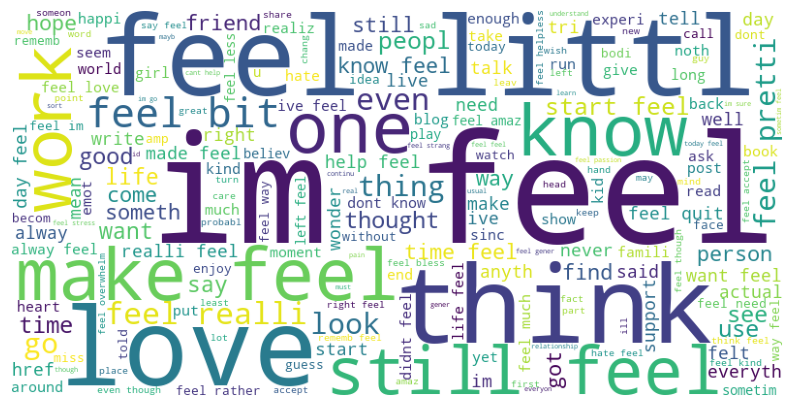

In [51]:
def make_word_cloud(text):
    wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
all_words = ' '.join(df1['cleaned_text'])
make_word_cloud(all_words)

#### ngrams
plot the most common followed n words 

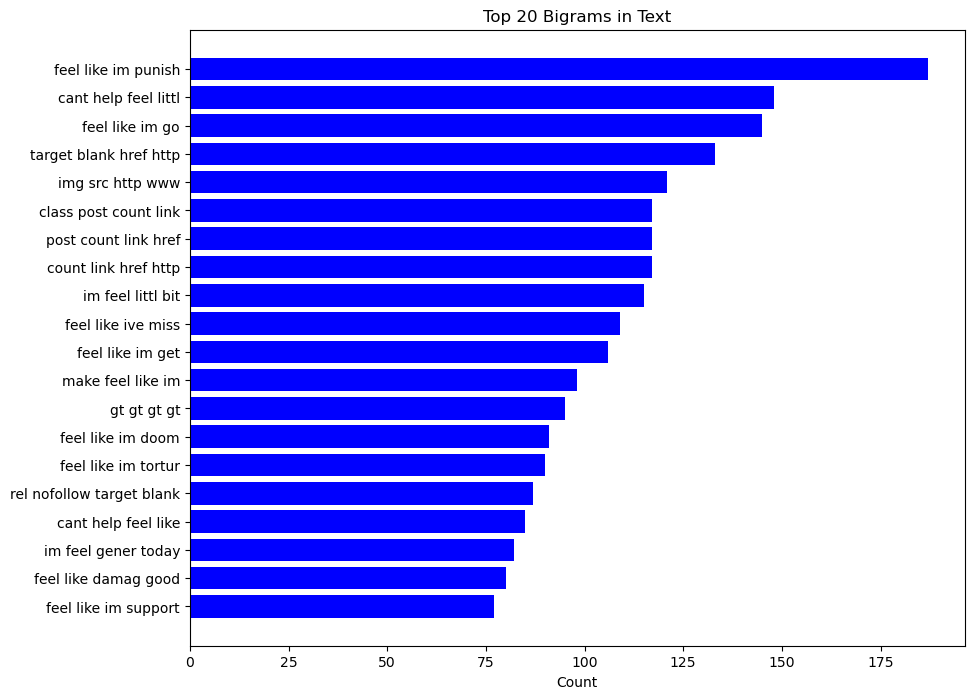

In [52]:
def get_top_m_ngram(corpus, n,m):
    vec = CountVectorizer(ngram_range=(n,n)).fit(corpus)#bag-of-words representation of the text corpus
    #ngram_range=(2, 2) specifies that we want to extract bigrams.
    bag_of_words = vec.transform(corpus)#transforms the corpus into a matrix of token counts.
    sum_words = bag_of_words.sum(axis=0)#calculates the total count of each word (bigram) across all documents.
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]# list contains tuples of bigrams and their corresponding counts.
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)# sorts the bigrams by count in descending order
    return words_freq[:m]

common_ngrams = get_top_m_ngram(df1['cleaned_text'], 4,20)

df_ngrams = pd.DataFrame(common_ngrams, columns=['bigram', 'count'])#transfer tuples into dataframe with bigram& counts columns 

plt.figure(figsize=(10, 8))
plt.barh(df_ngrams['bigram'], df_ngrams['count'], color='blue')# plot a horizontal bar plot
plt.xlabel('Count')
plt.title('Top 20 Bigrams in Text')
plt.gca().invert_yaxis() # invert the Y axis 
plt.show()

## CNN Model

### Splitting Data

In [53]:
df2=df1.copy()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df2["cleaned_text"],df2["label"],test_size=.2,random_state=42)

### set the parameters

In [54]:
num_words=50000
maxlen=100
padding='post'



### tokenizer

In [55]:
tokenizer= Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x_train)
x_train_padded = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen=100, padding='post')
x_test_padded = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen=100, padding='post')

### model structure 

In [56]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=50000, output_dim=16, input_length=100),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax')
    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           800000    
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           10368     
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 819014 (3.12 MB)
Trainable params: 819014 (3.12 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### Compilation

In [57]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fitting 

In [58]:
early_stopping = EarlyStopping(monitor="val_accur", patience=3, restore_best_weights=True)#patience: The number of epochs with no improvement dd
history_cnn =model.fit(x=x_train_padded, y=y_train, epochs=10, 
                             validation_data=(x_test_padded, y_test),
                             callbacks=[early_stopping])

Epoch 1/10
10421/10421 [==============================] - 50s 5ms/step - loss: 0.5373 - accuracy: 0.7824 - val_loss: 0.2501 - val_accuracy: 0.8968
Epoch 2/10
10421/10421 [==============================] - 51s 5ms/step - loss: 0.2135 - accuracy: 0.9059 - val_loss: 0.2020 - val_accuracy: 0.9053
Epoch 3/10
10421/10421 [==============================] - 49s 5ms/step - loss: 0.1768 - accuracy: 0.9156 - val_loss: 0.1851 - val_accuracy: 0.9097
Epoch 4/10
10421/10421 [==============================] - 50s 5ms/step - loss: 0.1571 - accuracy: 0.9216 - val_loss: 0.1833 - val_accuracy: 0.9078
Epoch 5/10
10421/10421 [==============================] - 50s 5ms/step - loss: 0.1443 - accuracy: 0.9253 - val_loss: 0.1852 - val_accuracy: 0.9067
Epoch 6/10
10421/10421 [==============================] - 50s 5ms/step - loss: 0.1350 - accuracy: 0.9286 - val_loss: 0.1884 - val_accuracy: 0.9056
Epoch 7/10
10421/10421 [==============================] - 50s 5ms/step - loss: 0.1274 - accuracy: 0.9310 - val_loss: 0

### Evaluation

In [59]:
evaluation_result=model.evaluate(x_test_padded,y_test)

2606/2606 [==============================] - 3s 1ms/step - loss: 0.2260 - accuracy: 0.9008


### training and validation & loss vitalization 

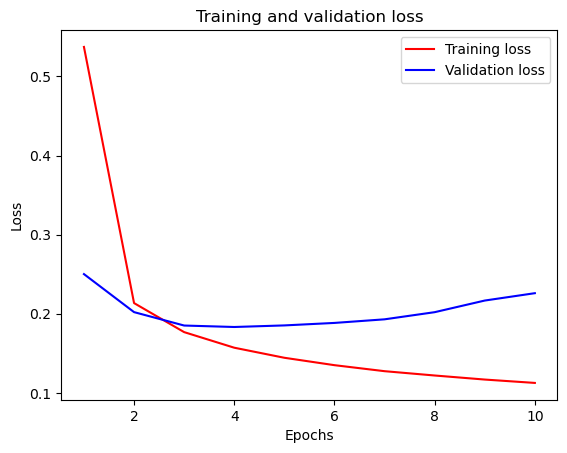

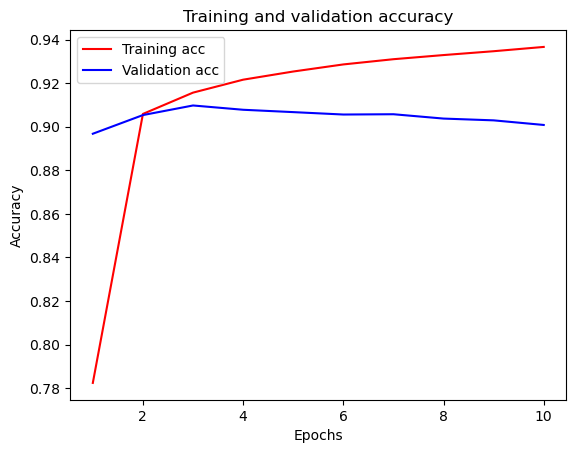

In [60]:
train_loss=history_cnn.history['loss']
val_loss=history_cnn.history['val_loss']
train_acc=history_cnn.history['accuracy']
val_acc=history_cnn.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, train_acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## Thank YooooooooooooooooooooooooooooooooooooU